In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import quandl

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, timedelta

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [8]:
# Set time frames for analysis
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2019-03-29')

# Get a stock data for portfolio: Activision Blizzard Inc. (ATVI)
df = quandl.get('WIKI/ATVI', start_date=start, end_date=end)

In [9]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-01-04,11.2300,11.45,11.1500,11.30,9306600.0,0.0,1.0,10.265482,10.466586,10.192353,10.329469,9306600.0
2010-01-05,11.2419,11.36,11.2100,11.32,11366100.0,0.0,1.0,10.276360,10.384316,10.247199,10.347752,11366100.0
2010-01-06,11.2600,11.38,11.2100,11.26,6537800.0,0.0,1.0,10.292905,10.402598,10.247199,10.292905,6537800.0
2010-01-07,11.1000,11.19,10.9319,10.99,15390800.0,0.0,1.0,10.146647,10.228917,9.992985,10.046095,15390800.0
2010-01-08,10.9700,11.05,10.8800,10.90,11002500.0,0.0,1.0,10.027812,10.100941,9.945542,9.963824,11002500.0


In [10]:
# Set number of days to forecast
forecast = 30
df['Prediction'] = df['Adj. Close'].shift(-forecast)

In [11]:
x = np.array(df.drop(['Prediction'], 1))
x = x[:-forecast]

In [12]:
y = np.array(df['Prediction'])
y = y[:-forecast]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [17]:
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

linear_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)

/anaconda3/envs/finance/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
linear_model_score = linear_model.score(x_test, y_test)
print(f'Linear Model score: {linear_model_score}')

ridge_model_score = ridge_model.score(x_test, y_test)
print(f'Ridge Model score: {ridge_model_score}')

lasso_model_score = lasso_model.score(x_test, y_test)
print(f'Lasso Model score: {lasso_model_score}')

Linear Model score: 0.9825181422045278
Ridge Model score: 0.9825944725300587
Lasso Model score: 0.9803472953107535


In [19]:
x_forecast = np.array(df.drop(['Prediction'], 1))[-forecast:]
linear_model_forecast_prediction = linear_model.predict(x_forecast)
linear_model_real_prediction = linear_model.predict(np.array(df.drop(['Prediction'], 1)))
ridge_model_forecast_prediction = ridge_model.predict(x_forecast)
ridge_model_real_prediction = ridge_model.predict(np.array(df.drop(['Prediction'], 1)))
lasso_model_forecast_prediction = lasso_model.predict(x_forecast)
lasso_model_real_prediction = lasso_model.predict(np.array(df.drop(['Prediction'], 1)))

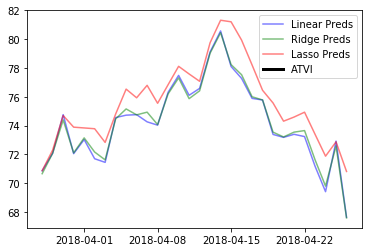

In [22]:
predicted_dates = []
recent_date = df.index.max()
display_at = 3500
alpha = 0.5

for i in range(forecast):
    recent_date += timedelta(days=1)
    predicted_dates.append(recent_date)

plt.plot(df.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Preds', c='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_forecast_prediction, c='blue', alpha=alpha)
plt.plot(df.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Preds', c='green', alpha=alpha)
plt.plot(predicted_dates, ridge_model_forecast_prediction, c='green', alpha=alpha)
plt.plot(df.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Preds', c='red', alpha=alpha)
plt.plot(predicted_dates, lasso_model_forecast_prediction, c='red', alpha=alpha)
plt.plot(df.index[display_at:], df['Adj. Close'][display_at:], label='ATVI', c='black', linewidth=3)
plt.legend()